<h1> Machine Learning Pipeline </h1>

Practice exercise which follows the ML project workflow proposed by "Hands-On ML..."

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn.datasets
import sklearn.ensemble
import sklearn.externals
import sklearn.impute
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.tree

<h2> 1. Frame the Problem and Look at the Big Picture </h2>

<h2> 2. Get the Data </h2>

<h3> Download the Data </h3>

In [2]:
boston_data_bundle = sklearn.datasets.load_boston()

In [3]:
print(boston_data_bundle.DESCR)
print('Dataset callables: {0}'.format(dir(boston_data_bundle)))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<h3> Quick Overview </h3>

In [4]:
boston_df = pd.DataFrame(boston_data_bundle.data, columns=boston_data_bundle.feature_names)
boston_df['MHV'] = boston_data_bundle.target

In [5]:
print(boston_df.info())
print(boston_df.describe())
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MHV        506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.56100

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MHV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Mean House Value Histogram:


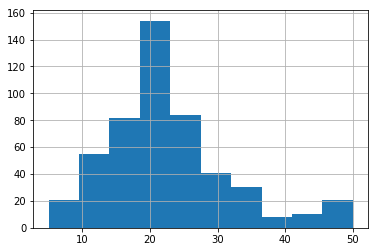

In [6]:
print('Mean House Value Histogram:')
boston_df['MHV'].hist(); plt.show()

<h3> Generate the Test Set </h3>

In [7]:
# train_df, test_df = sklearn.model_selection.train_test_split(boston_df, test_size=0.2, random_state=1)

splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
split = list(splitter.split(boston_df, boston_df['MHV'] >= 40))
train_df, test_df = boston_df.loc[list(split[0][0])], boston_df.loc[list(split[0][1])]

train_X_df = train_df[[col for col in train_df.columns if col!='MHV']]
train_y_series = train_df['MHV']

test_X_df = test_df[[col for col in test_df.columns if col!='MHV']]
test_y_series = test_df['MHV']

In [8]:
print('Train DF Shape: {0}'.format(train_df.shape))
print('Test DF Shape: {0}'.format(test_df.shape))
train_df.head()

Train DF Shape: (404, 14)
Test DF Shape: (102, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MHV
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45,22.8
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8


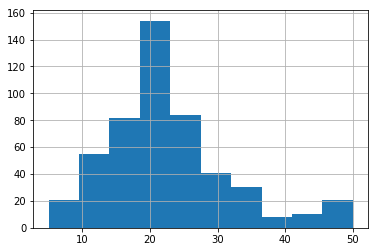

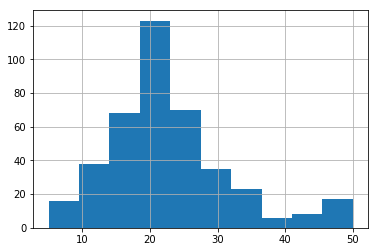

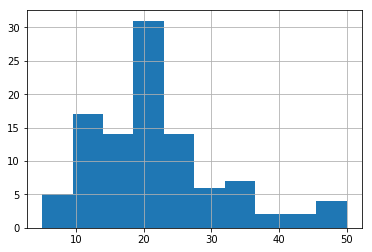

In [9]:
boston_df['MHV'].hist(); plt.show()
train_df['MHV'].hist(); plt.show()
test_df['MHV'].hist(); plt.show()

<h2> 3. Explore the Data to Gain Insights </h2>

<h3> Examining Correlations </h3>

In [10]:
corr_mat = train_df.corr().round(2)
corr_mat['MHV'].sort_values(ascending=False)

MHV        1.00
RM         0.69
ZN         0.36
B          0.31
DIS        0.25
CHAS       0.18
AGE       -0.38
CRIM      -0.38
RAD       -0.39
NOX       -0.43
TAX       -0.45
INDUS     -0.47
PTRATIO   -0.51
LSTAT     -0.75
Name: MHV, dtype: float64

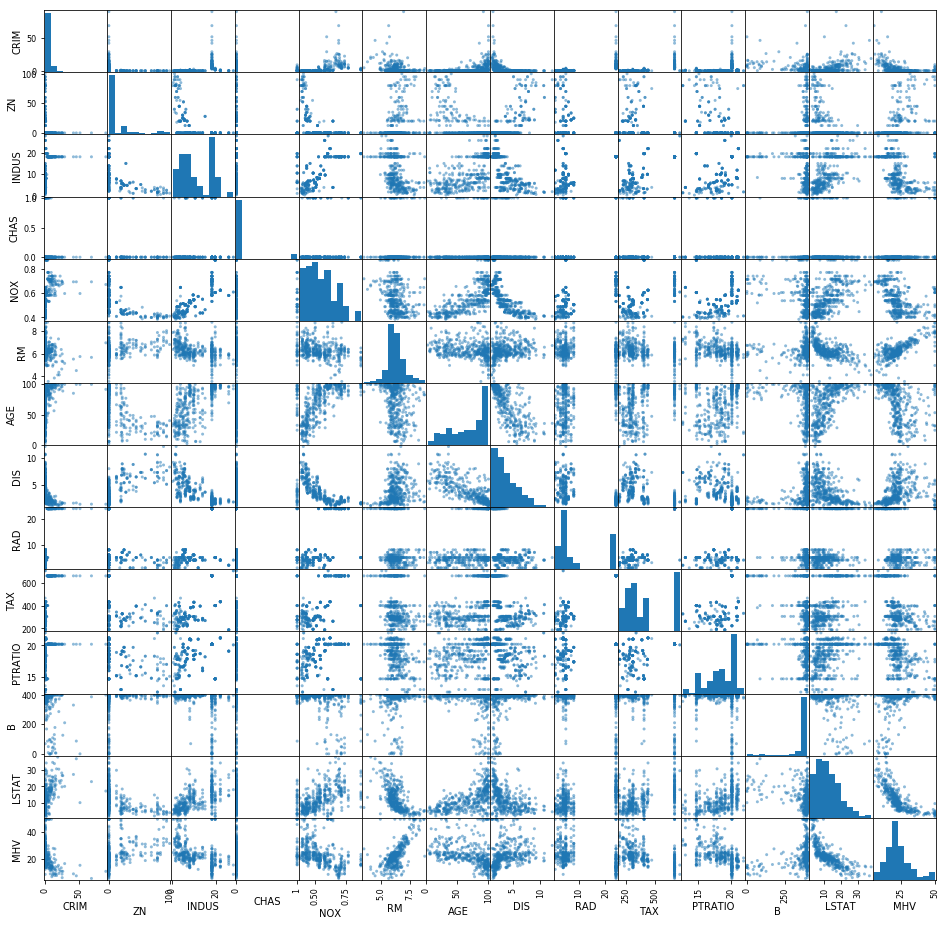

In [11]:
pd.plotting.scatter_matrix(train_df, figsize=(16, 16)); plt.show()

<h3> Investigate Useful Artificial Features from Combinations </h3>

<h2> 4. Prepare the Data for Machine Learning Algorithms </h2>

<h3> Data Cleaning </h3>

In [12]:
imputer = sklearn.impute.SimpleImputer(strategy='median')
imputed_mat = imputer.fit_transform(train_X_df)

In [13]:
print(imputed_mat.shape)
imputed_mat[:3]

(404, 13)


array([[1.4866e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.7270e+00, 7.9900e+01, 2.7778e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9476e+02, 9.4200e+00],
       [1.3587e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        6.0640e+00, 5.9100e+01, 4.2392e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.8132e+02, 1.4660e+01],
       [7.6162e-01, 2.0000e+01, 3.9700e+00, 0.0000e+00, 6.4700e-01,
        5.5600e+00, 6.2800e+01, 1.9865e+00, 5.0000e+00, 2.6400e+02,
        1.3000e+01, 3.9240e+02, 1.0450e+01]])

<h3> Transformation Pipeline </h3>

In [14]:
pipeline = sklearn.pipeline.Pipeline([
    ('imputer', sklearn.impute.SimpleImputer(strategy='median')),
    ('std_scaler', sklearn.preprocessing.StandardScaler())
])

train_X_prep_mat = pipeline.fit_transform(train_X_df)

In [15]:
print(train_X_prep_mat.shape)
train_X_prep_mat[:3]

(404, 13)


array([[-0.40304382, -0.4976867 , -0.35801338, -0.28322059, -0.27269728,
         0.59087685,  0.42856066, -0.51092646, -0.51696629, -0.13719461,
         1.14376924,  0.40186319, -0.42362721],
       [-0.40459204, -0.4976867 , -0.05874019,  3.53081671, -0.54298605,
        -0.33611719, -0.30919509,  0.1664362 , -0.63178453, -0.77987436,
         0.08161615,  0.24373521,  0.32003276],
       [-0.32884502,  0.32609872, -1.03469511, -0.28322059,  0.83461477,
        -1.04080044, -0.1779597 , -0.87769605, -0.51696629, -0.85795694,
        -2.5044957 ,  0.37409667, -0.27744978]])

<h2> 5. Explore Models and Short-List the Best </h2>

<h3> Explore Models </h3>

In [16]:
model = sklearn.linear_model.LinearRegression()
model = sklearn.tree.DecisionTreeRegressor()
model = sklearn.ensemble.RandomForestRegressor()

model.fit(train_X_prep_mat, train_y_series)
pred_train_mat = model.predict(train_X_prep_mat)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
print(pred_train_mat.shape)
print('Actual: {0}'.format(train_y_series[:3]))
print('Predictions: {0}'.format(pred_train_mat[:3]))
print('RMSE: {0}'.format(round(np.sqrt(sklearn.metrics.mean_squared_error(train_y_series, pred_train_mat)), 2)))

(404,)
Actual: 100    27.5
208    24.4
265    22.8
Name: MHV, dtype: float64
Predictions: [25.33 22.74 21.38]
RMSE: 1.67


In [18]:
print(train_y_series.min())
print(train_y_series.max())
print(pred_train_mat.min())
print(pred_train_mat.max())

5.0
50.0
7.15
50.0


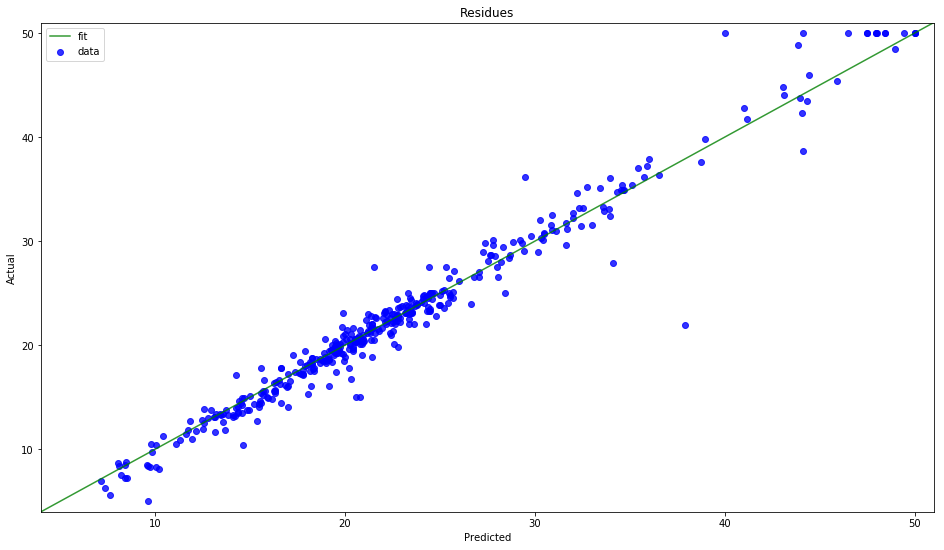

In [19]:
plt.rcParams["figure.figsize"] = (16, 9)

OFFSET = 1
PLOT_MIN = min(train_y_series.min(), pred_train_mat.min()) - OFFSET
PLOT_MAX = min(train_y_series.max(), pred_train_mat.max()) + OFFSET

plt.xlim(PLOT_MIN, PLOT_MAX)
plt.ylim(PLOT_MIN, PLOT_MAX)

plt.scatter(pred_train_mat, train_y_series, color='blue', alpha=0.8, label='data')
plt.plot([PLOT_MIN, PLOT_MAX], [PLOT_MIN, PLOT_MAX], color='green', alpha=0.8, label='fit')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Residues')
plt.legend(loc='best')

plt.show();

<h3> Cross Validation </h3>

In [20]:
model = sklearn.linear_model.LinearRegression()
model = sklearn.tree.DecisionTreeRegressor()
model = sklearn.ensemble.RandomForestRegressor()

scores = sklearn.model_selection.cross_val_score(model, train_X_prep_mat, train_y_series,
                                                 scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)

print('Scores: {0}'.format([round(x, 2) for x in scores]))
print('Mean: {0}'.format(round(scores.mean(), 2)))
print('STD: {0}'.format(round(scores.std(), 2)))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Scores: [3.52, 3.64, 3.41, 2.96, 2.66, 2.78, 2.67, 3.45, 4.29, 6.47]
Mean: 3.58
STD: 1.08


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<h2> 6. Fine-Tune the Models and Combine Them </h2>

<h3> Hyperparameter Grid Search </h3>

In [21]:
model = sklearn.ensemble.RandomForestRegressor()
param_grid = [
    {'bootstrap': [True, False], 'max_features': [2, 5, 8, 12], 'n_estimators': [3, 10, 30]}
]

grid_search = sklearn.model_selection.GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(train_X_prep_mat, train_y_series)
grid_search.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True, 'max_features': 5, 'n_estimators': 30}

In [22]:
final_model = grid_search.best_estimator_
final_model.fit(train_X_prep_mat, train_y_series)
pred_train_mat = final_model.predict(train_X_prep_mat)

In [23]:
print(pred_train_mat.shape)
print('Actual: {0}'.format(train_y_series[:3]))
print('Predictions: {0}'.format(pred_train_mat[:3]))
print('RMSE: {0}'.format(round(np.sqrt(sklearn.metrics.mean_squared_error(train_y_series, pred_train_mat)), 2)))

(404,)
Actual: 100    27.5
208    24.4
265    22.8
Name: MHV, dtype: float64
Predictions: [26.67       22.86333333 23.46666667]
RMSE: 1.27


In [24]:
scores = sklearn.model_selection.cross_val_score(final_model, train_X_prep_mat, train_y_series,
                                                 scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)

print('Scores: {0}'.format([round(x, 2) for x in scores]))
print('Mean: {0}'.format(round(scores.mean(), 2)))
print('STD: {0}'.format(round(scores.std(), 2)))

Scores: [3.23, 2.73, 2.65, 2.77, 2.45, 3.46, 2.79, 3.18, 3.15, 5.87]
Mean: 3.23
STD: 0.93


In [25]:
sorted(zip(grid_search.best_estimator_.feature_importances_, train_X_df.columns), reverse=True)

[(0.3527367187732707, 'LSTAT'),
 (0.29864824905216614, 'RM'),
 (0.0702280442014552, 'NOX'),
 (0.0661275708836129, 'DIS'),
 (0.04906401535186287, 'CRIM'),
 (0.04615600110236294, 'PTRATIO'),
 (0.0445035201008953, 'INDUS'),
 (0.022818026589030604, 'AGE'),
 (0.01956134883450903, 'B'),
 (0.01710431161084121, 'TAX'),
 (0.006312853147441775, 'RAD'),
 (0.004993490673585901, 'CHAS'),
 (0.0017458496789655843, 'ZN')]

<h3> Export Model </h3>

In [26]:
MODEL_PATH = '../data/boston_model.pickle'
sklearn.externals.joblib.dump(final_model, MODEL_PATH)

['../data/boston_model.pickle']

<h3> Evaluate Model on Test Set </h3>

In [27]:
test_X_prep_mat = pipeline.transform(test_X_df)

In [28]:
final_model = sklearn.externals.joblib.load('../data/boston_model.pickle')
pred_test_mat = final_model.predict(test_X_prep_mat)

In [29]:
print(pred_test_mat.shape)
print('Actual: {0}'.format(test_y_series[:3]))
print('Predictions: {0}'.format(pred_test_mat[:3]))
print('RMSE: {0}'.format(round(np.sqrt(sklearn.metrics.mean_squared_error(test_y_series, pred_test_mat)), 2)))

(102,)
Actual: 110    21.7
145    13.8
158    24.3
Name: MHV, dtype: float64
Predictions: [20.76333333 16.2        24.81333333]
RMSE: 3.5


In [30]:
os.remove('../data/boston_model.pickle')

<h2> 7. Present the Solution </h2>

<h2> 8. Launch, Monitor and Maintain the System </h2>